# Análisis univariado: Edad

## Introducción y selección de la variable

El presente proyecto busca desarrollar un modelo de Machine Learning capaz de predecir la `edad` de una persona a partir de multiples características extraídas de imágenes y metadatos, tales como el género, la nitidez de la imagen, las coordenadas del rostro y el nivel de confianza en la detección facial.
En este notebook se pretende realizar un análisis univariado de la `edad` que representa la edad estimada o registrada de las personas presentes en el dataset y es la variable objetivo de los modelos que se pretenden desarrollar

## Explicación de su importancia

La variable `edad` es central en este conjunto de datos porque:
- Es una de las salidas principales del modelo de visión (estimación de edad).
- Permite **segmentar** y entender el comportamiento demográfico de los usuarios detectados por cámara.
- Permite identificar si existen suficientes ejemplos en todos los rangos etarios, lo cual es crucial para entrenar un modelo robusto y generalizable.
- Facilita la interpretación de los resultados y el diseño de estrategias adicionales, como el balanceo de datos o la transformación de la variable objetivo (por ejemplo, agrupar edades por rangos).
- Impacta decisiones de producto y cumplimiento (p. ej., flujos diferenciados por grupo etario, validaciones, accesos).
- Su distribución y calidad (sesgos, outliers, faltantes) **influyen en la confiabilidad** de todo el pipeline analítico.

---

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# --- Configuración para una mejor visualización ---
sns.set_style('whitegrid') 
plt.style.use('seaborn-v0_8-paper')

#### Exploración general del dataset

In [9]:
df = pd.read_csv("detecciones.csv")
print("Dimensiones del DataFrame:", df.shape)
print(df.head())
print(df.info())

Dimensiones del DataFrame: (300, 11)
   id  edad  genero  genero_conf   conf  bbox_x  bbox_y  bbox_w  bbox_h  \
0   1  36.0   Mujer        0.913  0.807     730      68      82     216   
1   2  27.0   Mujer        0.990  0.900     164     177     134     194   
2   3  26.0   Mujer        0.874  0.941     226     219      84     209   
3   4  34.0   Mujer        0.586  0.939     219     215     179     142   
4   5  35.0  Hombre        0.693  0.880     257      23     183     174   

   sharpness                   ts  
0      0.841  2025-08-27 10:59:40  
1      0.631  2025-08-27 10:59:42  
2      0.701  2025-08-27 10:59:45  
3      0.530  2025-08-27 10:59:47  
4      0.645  2025-08-27 10:59:53  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           300 non-null    int64  
 1   edad         293 non-null    float64
 2   genero       300 n

#### Análisis univariado de variable `edad`

In [10]:
# Seleccionar la columna 'edad'
edad_data = df['edad']
edad_data.info()

<class 'pandas.core.series.Series'>
RangeIndex: 300 entries, 0 to 299
Series name: edad
Non-Null Count  Dtype  
--------------  -----  
293 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


Se identifican solo 7 muestras con valores nulos en la variable `edad` por lo que se decide eliminarlas

In [11]:
# Eliminar valores nulos
edad_data = edad_data.dropna()

# Estadísticas descriptivas
edad_data.describe()

count    293.000000
mean      31.430034
std       10.446507
min        5.000000
25%       25.000000
50%       31.000000
75%       38.000000
max       62.000000
Name: edad, dtype: float64

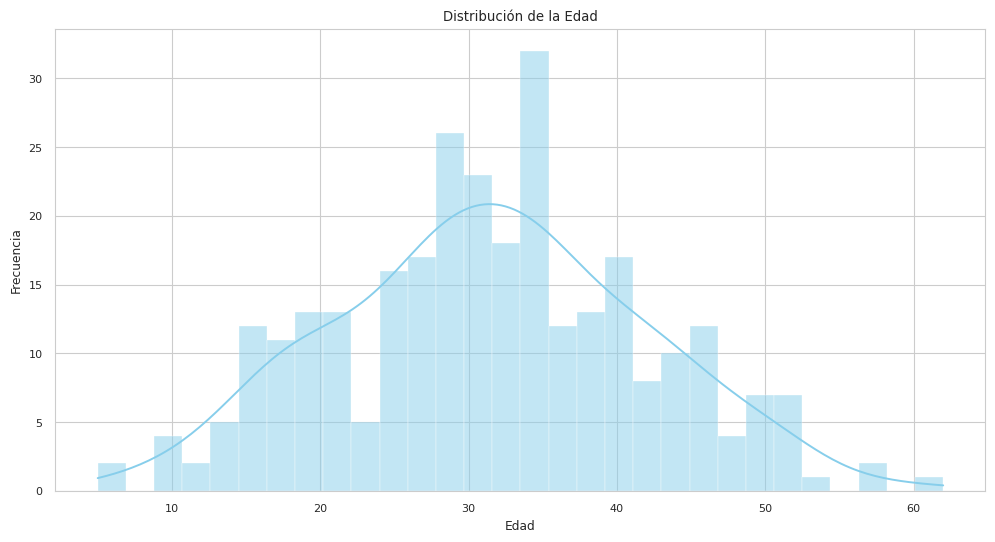

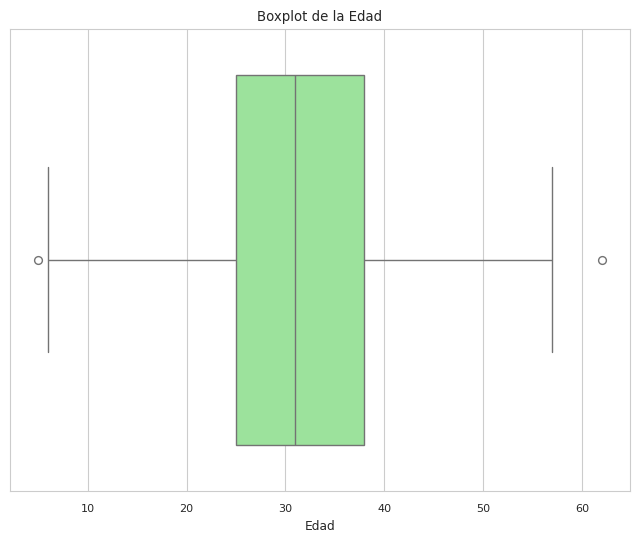

In [12]:
# Validación visual
plt.figure(figsize=(12, 6))
sns.histplot(edad_data, bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para identificar posibles outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=edad_data, color='lightgreen')
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

In [13]:
print("Moda:", edad_data.mode().values)
print("Valores únicos:", edad_data.nunique())

Moda: [35.]
Valores únicos: 49


In [14]:
bins = [0, 18, 30, 45, 65, 100]
labels = ['Menor de edad', 'Joven adulto', 'Adulto', 'Adulto mayor', 'Senior']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
print(df['grupo_edad'].value_counts())

grupo_edad
Adulto           133
Joven adulto      98
Adulto mayor      34
Menor de edad     28
Senior             0
Name: count, dtype: int64


### Conclusiones del análisis univariado de la variable edad

1. **Distribución y tendencia central:**

- La edad presenta una distribución aproximadamente normal, con una media y mediana cercanas a los 31 años. La moda es 35, lo que indica una ligera concentración de datos en esa edad.
- Hay una cantidad significativa de valores únicos (49), lo que indica buena diversidad y variabilidad en la variable, sin estar dominada por pocos valores repetidos.

2. **Rangos etarios y representatividad:**

- Al agrupar la edad en rangos, se observa que la mayoría de los datos corresponden a los grupos "Adulto" (133 casos, 45%) y "Joven adulto" (98 casos, 33%). "Adulto mayor" tiene 34 casos (12%) y "Menor de edad" solo 28 (10%). No hay registros para el grupo "Senior" (65 años o más).
- Esto implica que el modelo estará principalmente entrenado para predecir personas entre 18 y 65 años, y podría tener bajo desempeño para menores de edad, adultos mayores y personas senior, por la escasa representación de estos grupos.

3. **Valores atípicos y extremos:**
- Se detectan pocos valores atípicos (outliers) en los extremos, pero no son errores evidentes. Los valores mínimos y máximos (5 y 62 años) están dentro de un rango razonable, aunque la baja frecuencia en los extremos sugiere que podrían ser más sensibles a errores o ruido.

4. **Implicaciones para el modelado:**

- El modelo podría estar sesgado hacia adultos y adultos jóvenes, por lo que sería recomendable aplicar técnicas de balanceo si se espera un buen desempeño en todos los grupos etarios.
- Se debe tener precaución al interpretar predicciones para menores de edad, adultos mayores o personas senior, ya que el modelo no habrá visto suficientes ejemplos de estos rangos.